In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft
import math
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from onesidedcoupling import OnesidedCoupling

In [88]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k_up = np.arange(0,1, 0.01)
k_down = k_up[::-1]
gamma = 0.2
mu = 2
beta = 0.5
alpha = 0.1
T = OnesidedCoupling((1,1,1,1), t, keep, 1, mu, gamma, alpha, beta).period(10)[1]

In [89]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-10:]
    # if math.isnan(amp):
    #     return 0
    
    # else:
    return amp

In [90]:
par0 = 1,1,1,1
amplitudes_up = []
amplitudes_down = []

for f in k_up:
    sol = OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes_up.append(compute_amplitude(par0, t, keep, f, mu, gamma, alpha, beta))


par0 = sol[-1]

for j in k_down:
    sol = OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]  
    amplitudes_down.append(compute_amplitude(par0, t, keep, j, mu, gamma, alpha, beta))



In [91]:
amplitudes_down[-1]

array([], dtype=float64)

<function matplotlib.pyplot.show(close=None, block=None)>

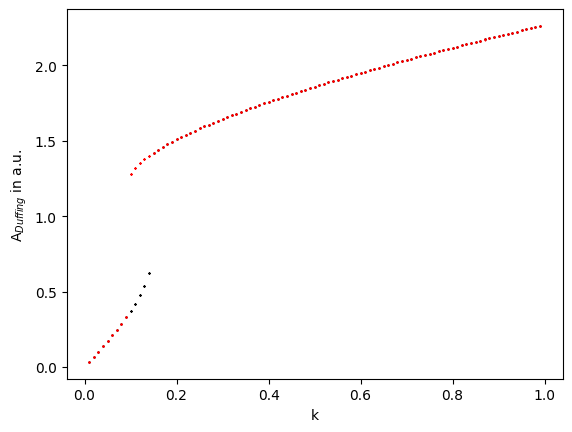

In [93]:
for e,k in enumerate(k_up):
    try:
        plt.plot([k]*10, amplitudes_up[e],'k.', markersize=0.5)
    except:
        None

for j,w in enumerate(k_down):
    try:
        plt.plot([w]*10, amplitudes_down[j],'r.', markersize=0.5)
    except:
        None

plt.xlabel("k")
plt.ylabel("A$_{Duffing}$ in a.u.")
plt.show

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:111: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(linearduffingvdp, par, t, args = (k, mu, gamma, alpha, beta), rtol= 0.000001)


<function matplotlib.pyplot.show(close=None, block=None)>

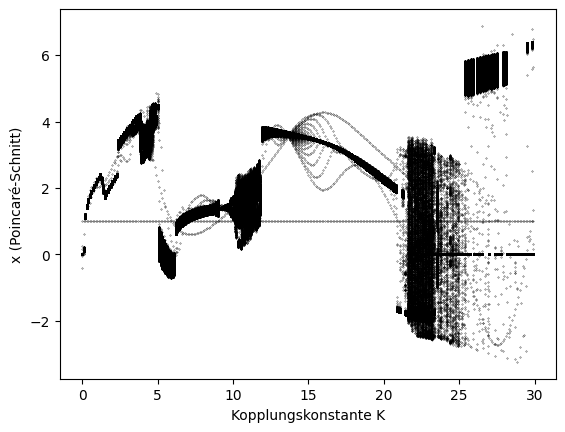

In [ ]:
duffing = []

for j in k:
    sol = OnesidedCoupling((1,1,1,1), times, keep, j, mu, gamma, alpha, beta).y_solv()
    duffing.append(sol)

for e, j in enumerate(k):plt.plot([j]*poincarepoints, duffing[e],'k.', markersize=0.5)
    

plt.xlabel("Kopplungskonstante K")
plt.ylabel("x (Poincaré-Schnitt)")
plt.show

In [54]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-6:])
    if math.isnan(amp):
        return 0
    
    else:
        return amp